In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import pandas as pd

#leo los dattos correspondientes
df1 = pd.read_excel("vehículos.xlsx")
df2 = pd.read_excel("DGT.xlsx")


In [3]:

# Borrar las columnas que no vamos a utilizar en ambos dataframes
df1 = df1.drop(['Municipio', 'Latitud', 'Longitud'], axis=1)
df2 = df2.drop(['Municipio', 'Latitud', 'Longitud'], axis=1)



In [4]:
import numpy as np
#Limpieza de una columna con valores 'Desconocido' y conversión a numérico


df1['Codigo INE'] = pd.to_numeric(df1['Codigo INE'].replace('Desconocido', np.nan), errors='coerce')
df2['Codigo INE'] = pd.to_numeric(df2['Codigo INE'].replace('Desconocido', np.nan), errors='coerce')

#df1['Provincia'] = pd.to_numeric(df1['Provincia'].replace('Desconocido', np.nan), errors='coerce')
#df2['Provincia'] = pd.to_numeric(df2['Provincia'].replace('Desconocido', np.nan), errors='coerce')

#df1['Comunidad Autonoma'] = pd.to_numeric(df1['Comunidad Autonoma'].replace('Desconocido', np.nan), errors='coerce')
#df2['Comunidad Autonoma'] = pd.to_numeric(df2['Comunidad Autonoma'].replace('Desconocido', np.nan), errors='coerce')



In [5]:
# Asegurándose de que las columnas de unión tienen el mismo tipo
df1['Codigo INE'] = df1['Codigo INE'].astype(str)
df2['Codigo INE'] = df2['Codigo INE'].astype(str)

# Asegurándose de que las columnas de unión tienen el mismo tipo
df1['Provincia'] = df1['Provincia'].astype(str)
df2['Provincia'] = df2['Provincia'].astype(str)

# Asegurándose de que las columnas de unión tienen el mismo tipo
df1['Comunidad Autonoma'] = df1['Comunidad Autonoma'].astype(str)
df2['Comunidad Autonoma'] = df2['Comunidad Autonoma'].astype(str)

# Asegurándose de que las columnas de unión tienen el mismo tipo
df1['Año'] = df1['Año'].astype(str)
df2['Año'] = df2['Año'].astype(str)


In [6]:
import pandas as pd

# Unión interna por las columnas comunes
df = pd.merge(df1, df2, on=['Codigo INE', 'Provincia', 'Comunidad Autonoma', 'Año'], how='inner')
df.head()


,Codigo INE,Provincia,Comunidad Autonoma,Población Total,Poblacion Hombres,Poblacion Mujeres,Conductores Hombres,Conductoras Mujeres,Censo Conductores,Parque Ciclomotores,...,Otros Fallecidos,Otros Heridos Graves,Otros Heridos Leves,Peatones Fallecidos,Peatones Heridos Graves,Peatones Heridos Leves,N Accidentes con Victimas,Fallecidos,Heridos Hospitalizados,Heridos no Hospitalizados
0,1001,Araba/Álava,País Vasco,2913.0,1512.0,1401.0,992.0,781.0,1773.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1002,Araba/Álava,País Vasco,10291.0,5101.0,5190.0,3715.0,2606.0,6321.0,248.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1003,Araba/Álava,País Vasco,1496.0,791.0,705.0,576.0,425.0,1001.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1004,Araba/Álava,País Vasco,1829.0,914.0,915.0,621.0,488.0,1109.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1006,Araba/Álava,País Vasco,239.0,128.0,111.0,88.0,71.0,159.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


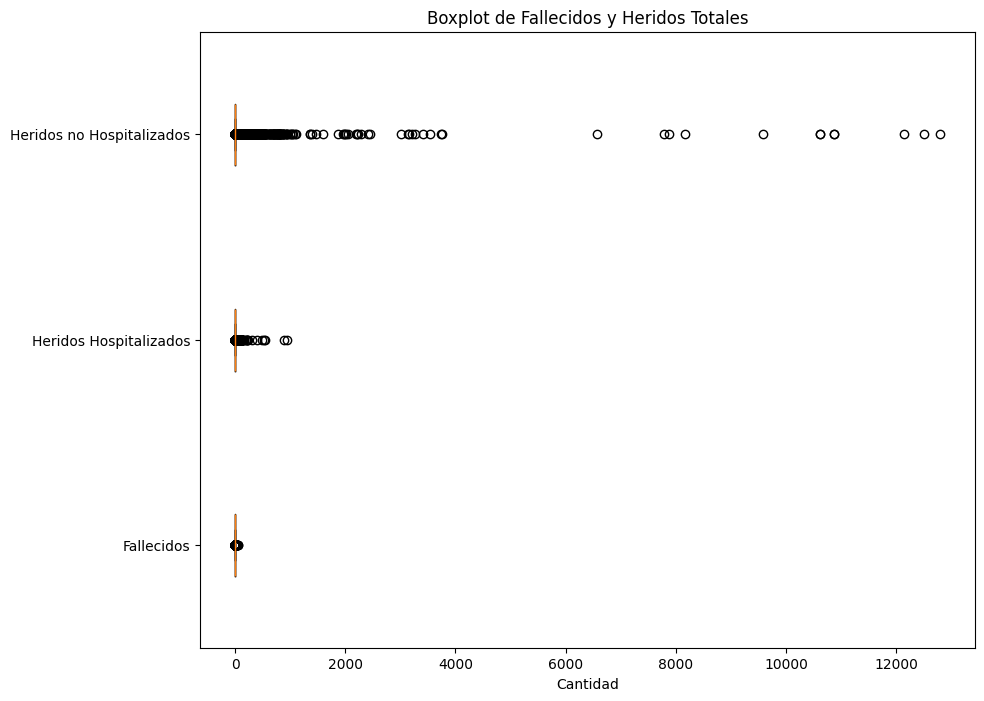

In [7]:
# Crear boxplots para múltiples variables
import matplotlib.pyplot as plt
variables = ['Fallecidos', 'Heridos Hospitalizados', 'Heridos no Hospitalizados']
data_to_plot = [df[var].dropna() for var in variables]

plt.figure(figsize=(10, 8))
plt.boxplot(data_to_plot, vert=False, labels=variables)
plt.title('Boxplot de Fallecidos y Heridos Totales')
plt.xlabel('Cantidad')
plt.show()

In [8]:
df = df.fillna(0)
df.head()

,Codigo INE,Provincia,Comunidad Autonoma,Población Total,Poblacion Hombres,Poblacion Mujeres,Conductores Hombres,Conductoras Mujeres,Censo Conductores,Parque Ciclomotores,...,Otros Fallecidos,Otros Heridos Graves,Otros Heridos Leves,Peatones Fallecidos,Peatones Heridos Graves,Peatones Heridos Leves,N Accidentes con Victimas,Fallecidos,Heridos Hospitalizados,Heridos no Hospitalizados
0,1001,Araba/Álava,País Vasco,2913.0,1512.0,1401.0,992.0,781.0,1773.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1002,Araba/Álava,País Vasco,10291.0,5101.0,5190.0,3715.0,2606.0,6321.0,248.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1003,Araba/Álava,País Vasco,1496.0,791.0,705.0,576.0,425.0,1001.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1004,Araba/Álava,País Vasco,1829.0,914.0,915.0,621.0,488.0,1109.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1006,Araba/Álava,País Vasco,239.0,128.0,111.0,88.0,71.0,159.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1. RANDOM FOREST

## 1.1 Fallecidos predicción

In [23]:

dfFallecidos = df

columns_to_drop = [
    'Peatones Fallecidos', 'Motocicletas Fallecidos', 'Turismos Fallecidos', 'Ciclomotores Fallecidos', "Bicicletas Fallecidos", "Furgonetas Fallecidos", "Camiones Fallecidos", "Autobus Fallecidos", "Otros Fallecidos",
    'Peatones Heridos Graves', 'Motocicletas Heridos Graves','Turismos Heridos Graves', 'Ciclomotores Heridos Graves', 'Bicicletas Heridos Graves',"Furgonetas Heridos Graves", "Camiones Heridos Graves", "Autobus Heridos Graves", "Otros Heridos Graves",
    'Peatones Heridos Leves','Motocicletas Heridos Leves','Turismos Heridos Leves','Ciclomotores Heridos Leves','Bicicletas Heridos Leves', 'Furgonetas Heridos Leves','Camiones Heridos Leves', 'Autobus Heridos Leves', 'Otros Heridos Leves',
    "N Accidentes con Victimas", "Heridos Hospitalizados",  'Heridos no Hospitalizados', "Fallecidos"
]
# Seleccionar características y la variable objetivo
features = dfFallecidos.drop(columns=columns_to_drop, axis=1)  # Elimina la columna 'Fallecidos' para obtener las características
target = dfFallecidos['Fallecidos']  # La variable objetivo


Revisar Variables con Alta Importancia: Dado que variables como "Peatones Fallecidos" y "Motocicletas Fallecidos" son muy predictivas, puede haber un problema de fuga de datos (data leakage). Estas variables podrían estar dando información sobre el evento después de que ha ocurrido, lo que no sería útil en un escenario de predicción real. Si el objetivo es predecir "Fallecidos" antes de que se conozcan detalles del accidente, considera excluir variables que directamente cuenten fallecidos en categorías específicas.

In [24]:
# Convertir variables categóricas a dummies
features = pd.get_dummies(features)
features.head()

,Población Total,Poblacion Hombres,Poblacion Mujeres,Conductores Hombres,Conductoras Mujeres,Censo Conductores,Parque Ciclomotores,Parque Motocicletas,Parque Turismos,Parque Furgonetas,...,Comunidad Autonoma_Murcia (Región de),Comunidad Autonoma_Navarra (Comunidad Foral de),Comunidad Autonoma_País Vasco,Comunidad Autonoma_Rioja (La),Año_2017,Año_2018,Año_2019,Año_2020,Año_2021,Año_2022
0,2913.0,1512.0,1401.0,992.0,781.0,1773.0,41.0,170.0,1525.0,138.0,...,False,False,True,False,True,False,False,False,False,False
1,10291.0,5101.0,5190.0,3715.0,2606.0,6321.0,248.0,470.0,5060.0,542.0,...,False,False,True,False,True,False,False,False,False,False
2,1496.0,791.0,705.0,576.0,425.0,1001.0,33.0,75.0,888.0,152.0,...,False,False,True,False,True,False,False,False,False,False
3,1829.0,914.0,915.0,621.0,488.0,1109.0,37.0,102.0,979.0,112.0,...,False,False,True,False,True,False,False,False,False,False
4,239.0,128.0,111.0,88.0,71.0,159.0,5.0,22.0,167.0,20.0,...,False,False,True,False,True,False,False,False,False,False


In [25]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [26]:
# Crear el modelo de Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42) #100 arboles 

In [27]:
# Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predicciones = modelo_rf.predict(X_test)

In [28]:
# Calcular y mostrar el error cuadrático medio
mse = mean_squared_error(y_test, predicciones)
print(f"Error cuadrático medio (MSE): {mse}")

# Opcional: Mostrar la importancia de las características
importancias = pd.Series(modelo_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Importancia de las características:")
print(importancias.head(10))  # Mostrar las 10 características más importantes

Error cuadrático medio (MSE): 0.09303617979882649
Importancia de las características:
Conductores Hombres                0.086679
Poblacion Hombres                  0.062485
Conductoras Mujeres                0.062458
Parque Turismos (<25 años)         0.059735
Parque Ciclomotores (<25 años)     0.054996
Parque Turismos (<15 años)         0.053591
Motocicletas sin ITV (<25 años)    0.049934
Parque Turismos                    0.046449
Parque Motocicletas (<15 años)     0.042709
Población Total                    0.040506
dtype: float64


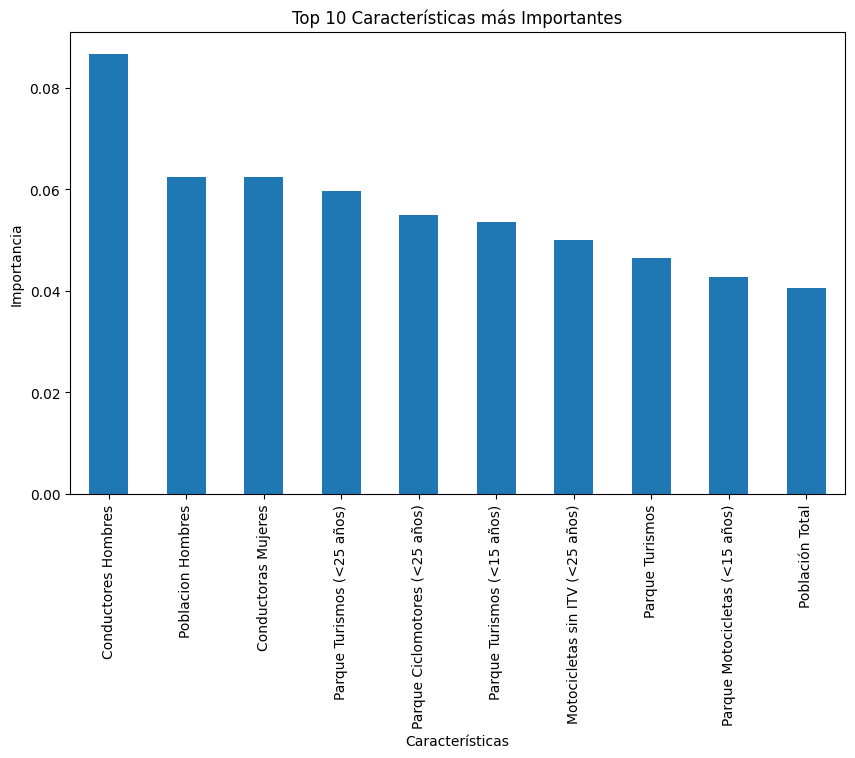

In [29]:


# Tomar las 10 características más importantes
top_importancias = importancias.head(10)

# Crear una gráfica de barras
plt.figure(figsize=(10, 6))
top_importancias.plot(kind='bar')
plt.title('Top 10 Características más Importantes')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.show()


In [30]:
# Calcular MSE y R²
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)
rmse=np.sqrt(mse)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")

Error Cuadrático Medio (MSE): 0.09303617979882649
Coeficiente de Determinación (R²): 0.8973393156769732


C:\Users\lolar\AppData\Local\Temp\ipykernel_24756\4185237121.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tasa Accidentes por 100k', y='Comunidad Autonoma', data=sorted_df, palette='coolwarm')


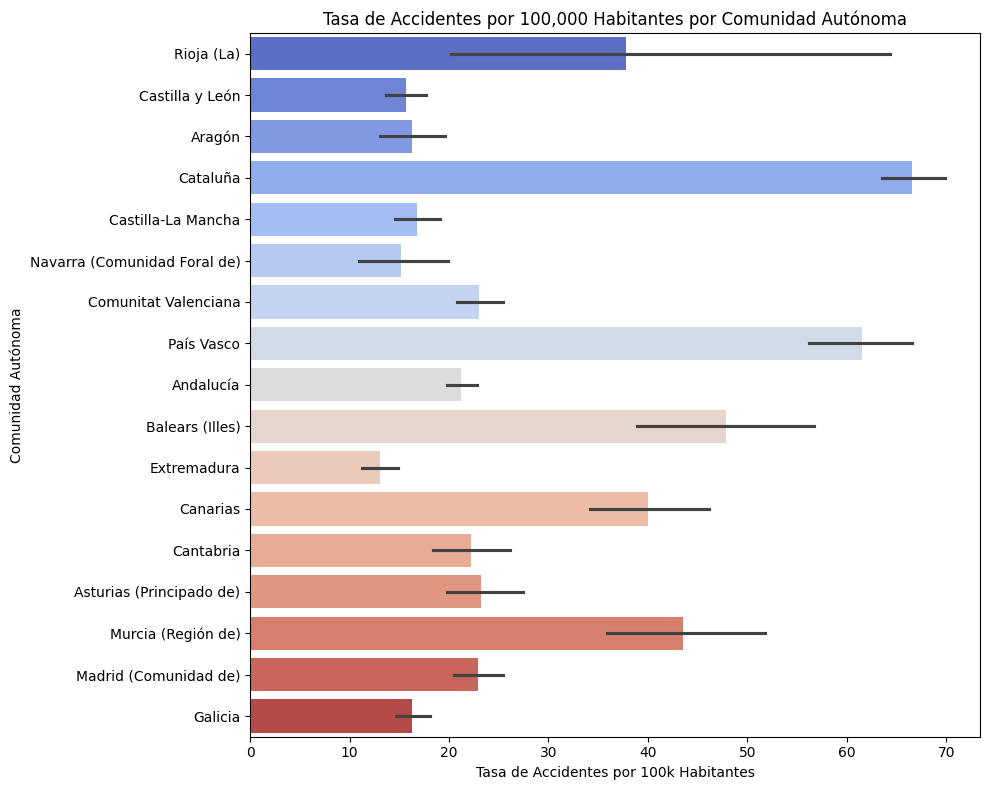

In [31]:
# Asumiendo que 'df' es tu DataFrame
df['Tasa Accidentes por 100k'] = (df['N Accidentes con Victimas'] / df['Población Total']) * 100000
import matplotlib.pyplot as plt
import seaborn as sns

# Luego, creamos un gráfico de barras ordenado por esta tasa.
plt.figure(figsize=(10, 8))
sorted_df = df.sort_values('Tasa Accidentes por 100k', ascending=False)
sns.barplot(x='Tasa Accidentes por 100k', y='Comunidad Autonoma', data=sorted_df, palette='coolwarm')

plt.title('Tasa de Accidentes por 100,000 Habitantes por Comunidad Autónoma')
plt.xlabel('Tasa de Accidentes por 100k Habitantes')
plt.ylabel('Comunidad Autónoma')

# Muestra el gráfico.
plt.tight_layout()
plt.show()


## 1.2 Predecir Heridos Hospitalizados

In [9]:
df_heridosHosp=df

In [10]:
columns_to_drop = [
    'Peatones Fallecidos', 'Motocicletas Fallecidos', 'Turismos Fallecidos', 'Ciclomotores Fallecidos', "Bicicletas Fallecidos", "Furgonetas Fallecidos", "Camiones Fallecidos", "Autobus Fallecidos", "Otros Fallecidos",
    'Peatones Heridos Graves', 'Motocicletas Heridos Graves','Turismos Heridos Graves', 'Ciclomotores Heridos Graves', 'Bicicletas Heridos Graves',"Furgonetas Heridos Graves", "Camiones Heridos Graves", "Autobus Heridos Graves", "Otros Heridos Graves",
    'Peatones Heridos Leves','Motocicletas Heridos Leves','Turismos Heridos Leves','Ciclomotores Heridos Leves','Bicicletas Heridos Leves', 'Furgonetas Heridos Leves','Camiones Heridos Leves', 'Autobus Heridos Leves', 'Otros Heridos Leves',
    "N Accidentes con Victimas", "Heridos Hospitalizados",  'Heridos no Hospitalizados', "Fallecidos"
]

# Seleccionar las características y la variable objetivo
features = df_heridosHosp.drop(columns=columns_to_drop, axis=1)  # Elimina las columnas para obtener las características
target = df_heridosHosp['Heridos Hospitalizados']  # Nueva variable objetivo


In [11]:

# Convertir variables categóricas a dummies si es necesario
features = pd.get_dummies(features)

In [12]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42) #100 árboles

In [13]:
# Entrenar el modelo con los nuevos datos
modelo_rf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predicciones = modelo_rf.predict(X_test)

In [14]:
# Calcular y mostrar las métricas de evaluación
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)

# Mostrar las métricas de evaluación
print(f"Error Cuadrático Medio (MSE) para 'Heridos Hospitalizados': {mse}")
print(f"Coeficiente de Determinación (R²) para 'Heridos Hospitalizados': {r2}")

Error Cuadrático Medio (MSE) para 'Heridos Hospitalizados': 51.00899462489523
Coeficiente de Determinación (R²) para 'Heridos Hospitalizados': 0.7857939739491225


In [15]:
import math

mse = 54.74590800502934
rmse = math.sqrt(mse)
rmse


7.399047776912198

Importancia de las características para 'Heridos Hospitalizados':
Conductores Hombres               0.191282
Poblacion Hombres                 0.088014
Poblacion Mujeres                 0.084387
Censo Conductores                 0.078701
Parque Motocicletas (<15 años)    0.065627
Conductoras Mujeres               0.059372
Parque Turismos (<25 años)        0.040581
Parque Total                      0.039754
Parque Turismos                   0.036854
Población Total                   0.030942
dtype: float64


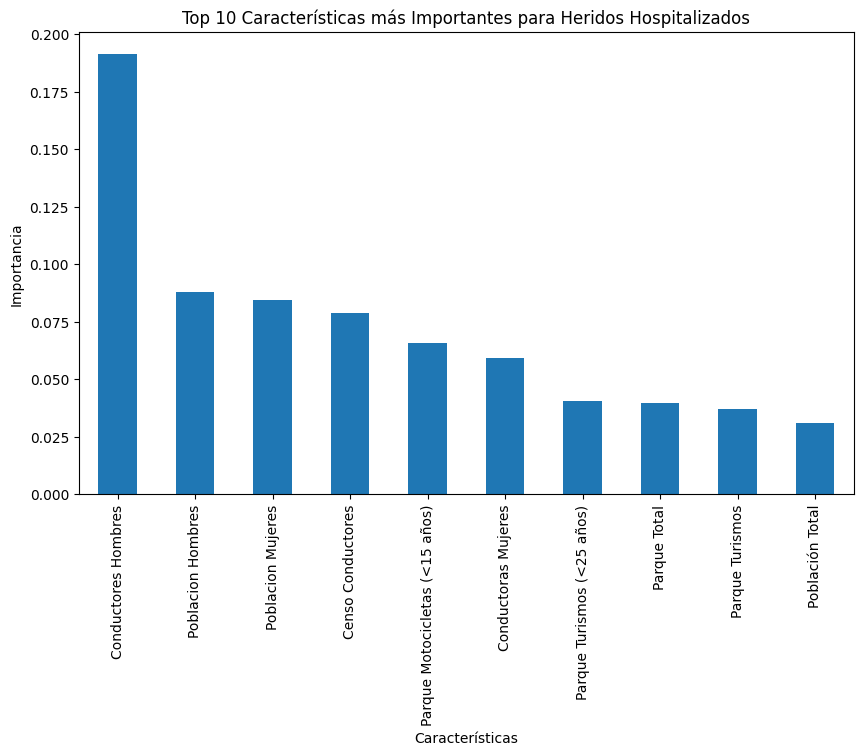

In [16]:
# Mostrar la importancia de las características
importancias = pd.Series(modelo_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Importancia de las características para 'Heridos Hospitalizados':")
print(importancias.head(10))

# Gráfico de las 10 características más importantes
plt.figure(figsize=(10, 6))
importancias.head(10).plot(kind='bar')
plt.title('Top 10 Características más Importantes para Heridos Hospitalizados')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.show()

## 1.3 Predecir Heridos no Hospitalizados

In [17]:
dfHerdiosNoHosp=df
columns_to_drop = [
    'Peatones Fallecidos', 'Motocicletas Fallecidos', 'Turismos Fallecidos', 'Ciclomotores Fallecidos', "Bicicletas Fallecidos", "Furgonetas Fallecidos", "Camiones Fallecidos", "Autobus Fallecidos", "Otros Fallecidos",
    'Peatones Heridos Graves', 'Motocicletas Heridos Graves','Turismos Heridos Graves', 'Ciclomotores Heridos Graves', 'Bicicletas Heridos Graves',"Furgonetas Heridos Graves", "Camiones Heridos Graves", "Autobus Heridos Graves", "Otros Heridos Graves",
    'Peatones Heridos Leves','Motocicletas Heridos Leves','Turismos Heridos Leves','Ciclomotores Heridos Leves','Bicicletas Heridos Leves', 'Furgonetas Heridos Leves','Camiones Heridos Leves', 'Autobus Heridos Leves', 'Otros Heridos Leves',
    "N Accidentes con Victimas", "Heridos Hospitalizados",  'Heridos no Hospitalizados', "Fallecidos"
]



# Seleccionar las características y la variable objetivo
features = dfHerdiosNoHosp.drop(columns=columns_to_drop, axis=1)
target = dfHerdiosNoHosp['Heridos no Hospitalizados']  # Nueva variable objetivo


In [18]:
features = pd.get_dummies(features)

In [19]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42) #100 árboles

In [20]:
# Entrenar el modelo con los nuevos datos
modelo_rf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predicciones = modelo_rf.predict(X_test)

In [21]:
# Calcular y mostrar las métricas de evaluación
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)

# Mostrar las métricas de evaluación
print(f"Error Cuadrático Medio (MSE) para 'Heridos Hospitalizados': {mse}")
print(f"Coeficiente de Determinación (R²) para 'Heridos Hospitalizados': {r2}")

Error Cuadrático Medio (MSE) para 'Heridos Hospitalizados': 1719.1421008067898
Coeficiente de Determinación (R²) para 'Heridos Hospitalizados': 0.9761978142730545


Importancia de las características para 'Heridos Hospitalizados':
Parque Motocicletas               0.070851
Parque Motocicletas (<15 años)    0.065701
Conductores Hombres               0.063675
Parque Motocicletas (<25 años)    0.062746
Poblacion Mujeres                 0.052618
Parque Ciclomotores (<25 años)    0.052586
Parque Total                      0.050426
Parque Ciclomotores               0.044813
Parque Motocicletas (<4 años)     0.043827
Poblacion Hombres                 0.042814
dtype: float64


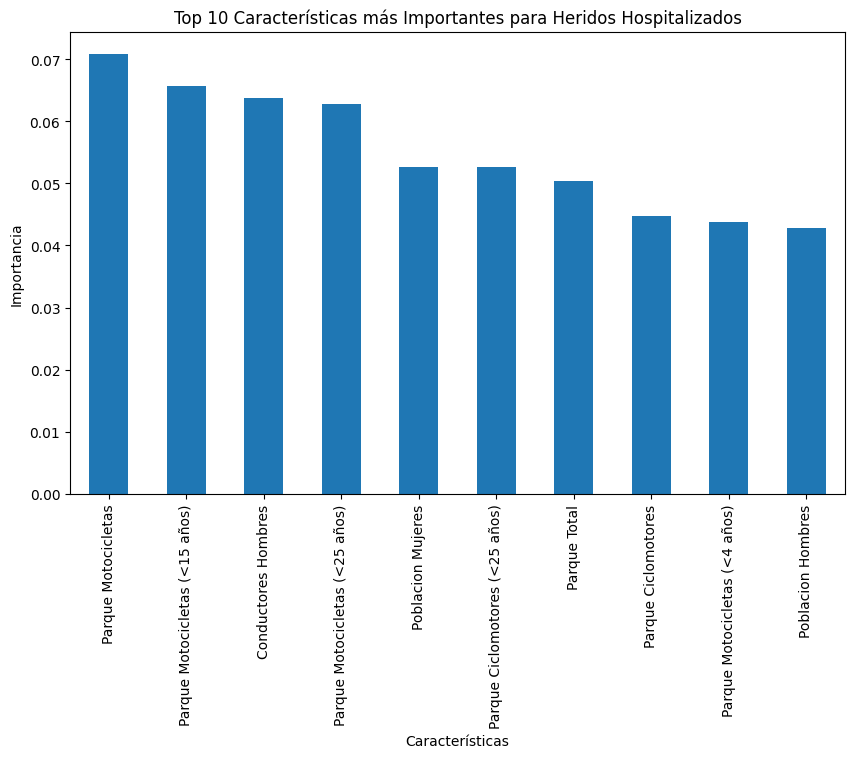

In [22]:
import matplotlib.pyplot as plt
# Mostrar la importancia de las características
importancias = pd.Series(modelo_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Importancia de las características para 'Heridos Hospitalizados':")
print(importancias.head(10))

# Gráfico de las 10 características más importantes
plt.figure(figsize=(10, 6))
importancias.head(10).plot(kind='bar')
plt.title('Top 10 Características más Importantes para Heridos Hospitalizados')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.show()

# 2 - ANN

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

## 2.1 PREDECIR FALLECIDOS


In [13]:
dfFallecidosANN= df
columns_to_drop = [
    'Peatones Fallecidos', 'Motocicletas Fallecidos', 'Turismos Fallecidos', 'Ciclomotores Fallecidos', "Bicicletas Fallecidos", "Furgonetas Fallecidos", "Camiones Fallecidos", "Autobus Fallecidos", "Otros Fallecidos",
    'Peatones Heridos Graves', 'Motocicletas Heridos Graves','Turismos Heridos Graves', 'Ciclomotores Heridos Graves', 'Bicicletas Heridos Graves',"Furgonetas Heridos Graves", "Camiones Heridos Graves", "Autobus Heridos Graves", "Otros Heridos Graves",
    'Peatones Heridos Leves','Motocicletas Heridos Leves','Turismos Heridos Leves','Ciclomotores Heridos Leves','Bicicletas Heridos Leves', 'Furgonetas Heridos Leves','Camiones Heridos Leves', 'Autobus Heridos Leves', 'Otros Heridos Leves',
    "N Accidentes con Victimas", "Heridos Hospitalizados",  'Heridos no Hospitalizados', "Fallecidos"
]

X = dfFallecidosANN.drop(columns=columns_to_drop, axis=1)
y = dfFallecidosANN['Fallecidos']


In [14]:
import pandas as pd


# Utiliza el método select_dtypes para seleccionar las columnas categóricas
categoricas = dfFallecidosANN.select_dtypes(include=['object'])

# Imprime las variables categóricas
print(categoricas)


      Codigo INE    Provincia Comunidad Autonoma   Año
0           1001  Araba/Álava         País Vasco  2017
1           1002  Araba/Álava         País Vasco  2017
2           1003  Araba/Álava         País Vasco  2017
3           1004  Araba/Álava         País Vasco  2017
4           1006  Araba/Álava         País Vasco  2017
...          ...          ...                ...   ...
47711      50297     Zaragoza             Aragón  2022
47712      50298     Zaragoza             Aragón  2022
47713      50901     Zaragoza             Aragón  2022
47714      50902     Zaragoza             Aragón  2022
47715      50903     Zaragoza             Aragón  2022

[47716 rows x 4 columns]


In [15]:
categorical_features = ['Codigo INE', 'Provincia', 'Comunidad Autonoma', "Año"]
numerical_features = X.columns.difference(categorical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [16]:

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data and transform the test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Define the ANN model
def build_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1)  # Output layer for regression; use activation='sigmoid' or 'softmax' for classification
    ])
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_squared_error'])
    return model




In [17]:
# Asegúrate de convertir las matrices dispersas en arrays densos
X_train = X_train.toarray()
X_test = X_test.toarray()


In [18]:
# Build and train the model
model = build_model(X_train.shape[1])
history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.2, verbose=1)



C:\Users\lolar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - loss: 0.1678 - mean_squared_error: 0.1678 - val_loss: 0.0723 - val_mean_squared_error: 0.0724
Epoch 2/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 0.1455 - mean_squared_error: 0.1455 - val_loss: 0.0735 - val_mean_squared_error: 0.0735
Epoch 3/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 0.0992 - mean_squared_error: 0.0992 - val_loss: 0.2011 - val_mean_squared_error: 0.2012
Epoch 4/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 0.1211 - mean_squared_error: 0.1211 - val_loss: 0.4008 - val_mean_squared_error: 0.4011
Epoch 5/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 0.0923 - mean_squared_error: 0.0923 - val_loss: 0.1432 - val_mean_squared_error: 0.1433
Epoch 6/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - loss: 0.1014 - mean_squared_error: 0.1014 - val_loss: 0.1392 - val_mean_squared_error: 0.1393
Epoch 7/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - loss: 0.1352 - mean_squared_error: 0.

In [19]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2  # Output the MSE and R2 scores to compare with Random Forest

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(0.09983004043282089, 0.8898426366066452)

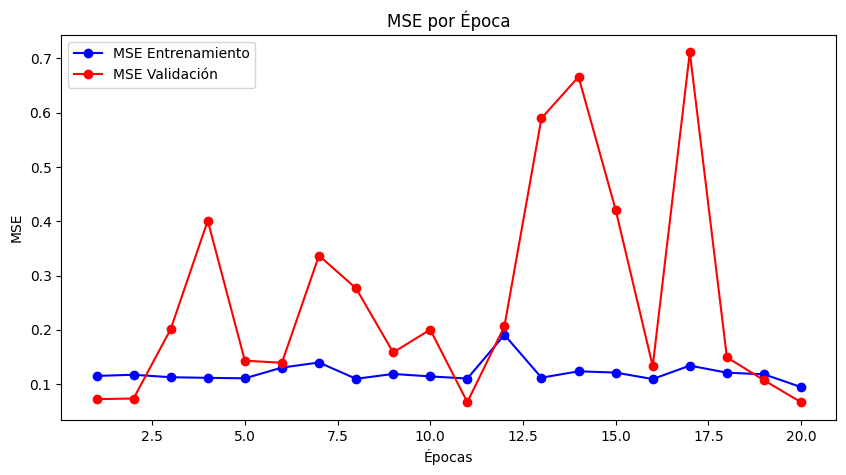

In [22]:
import matplotlib.pyplot as plt

# Suponiendo que 'history' es el objeto retornado por model.fit()
mse_train = history.history['mean_squared_error']
mse_val = history.history['val_mean_squared_error']
epochs = range(1, len(mse_train) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, mse_train, 'bo-', label='MSE Entrenamiento')
plt.plot(epochs, mse_val, 'ro-', label='MSE Validación')
plt.title('MSE por Época')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.show()


## 2.1 PREDECIR HERIDOS GRAVES

In [24]:
dfHeridosHospAnn=df
columns_to_drop = [
    'Peatones Fallecidos', 'Motocicletas Fallecidos', 'Turismos Fallecidos', 'Ciclomotores Fallecidos', "Bicicletas Fallecidos", "Furgonetas Fallecidos", "Camiones Fallecidos", "Autobus Fallecidos", "Otros Fallecidos",
    'Peatones Heridos Graves', 'Motocicletas Heridos Graves','Turismos Heridos Graves', 'Ciclomotores Heridos Graves', 'Bicicletas Heridos Graves',"Furgonetas Heridos Graves", "Camiones Heridos Graves", "Autobus Heridos Graves", "Otros Heridos Graves",
    'Peatones Heridos Leves','Motocicletas Heridos Leves','Turismos Heridos Leves','Ciclomotores Heridos Leves','Bicicletas Heridos Leves', 'Furgonetas Heridos Leves','Camiones Heridos Leves', 'Autobus Heridos Leves', 'Otros Heridos Leves',
    "N Accidentes con Victimas", "Heridos Hospitalizados",  'Heridos no Hospitalizados', "Fallecidos"
]

X = dfHeridosHospAnn.drop(columns=columns_to_drop, axis=1)
y = dfHeridosHospAnn['Heridos Hospitalizados']

In [25]:
import pandas as pd


# Utiliza el método select_dtypes para seleccionar las columnas categóricas
categoricas = dfHeridosHospAnn.select_dtypes(include=['object'])

# Imprime las variables categóricas
print(categoricas)

      Codigo INE    Provincia Comunidad Autonoma   Año
0           1001  Araba/Álava         País Vasco  2017
1           1002  Araba/Álava         País Vasco  2017
2           1003  Araba/Álava         País Vasco  2017
3           1004  Araba/Álava         País Vasco  2017
4           1006  Araba/Álava         País Vasco  2017
...          ...          ...                ...   ...
47711      50297     Zaragoza             Aragón  2022
47712      50298     Zaragoza             Aragón  2022
47713      50901     Zaragoza             Aragón  2022
47714      50902     Zaragoza             Aragón  2022
47715      50903     Zaragoza             Aragón  2022

[47716 rows x 4 columns]


In [26]:
categorical_features = ['Codigo INE', 'Provincia', 'Comunidad Autonoma', "Año"]
numerical_features = X.columns.difference(categorical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [27]:

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data and transform the test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Define the ANN model
def build_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1)  # Output layer for regression; use activation='sigmoid' or 'softmax' for classification
    ])
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

In [28]:
# Asegúrate de convertir las matrices dispersas en arrays densos
X_train = X_train.toarray()
X_test = X_test.toarray()

In [29]:
# Build and train the model
model = build_model(X_train.shape[1])
history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.2, verbose=1)

C:\Users\lolar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - loss: 16.7996 - mean_squared_error: 16.7996 - val_loss: 10.3854 - val_mean_squared_error: 10.3922
Epoch 2/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - loss: 9.5254 - mean_squared_error: 9.5254 - val_loss: 4.7701 - val_mean_squared_error: 4.7732
Epoch 3/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - loss: 7.6925 - mean_squared_error: 7.6925 - val_loss: 4.6675 - val_mean_squared_error: 4.6706
Epoch 4/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - loss: 6.6046 - mean_squared_error: 6.6046 - val_loss: 10.9655 - val_mean_squared_error: 10.9727
Epoch 5/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - loss: 5.0080 - mean_squared_error: 5.0080 - val_loss: 4.6005 - val_mean_squared_error: 4.6035
Epoch 6/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - loss: 6.8392 - mean_squared_error: 6.8392 - val_loss: 17.3964 - val_mean_squared_error: 17.4078
Epoch 7/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - loss: 5.8416 - mean_squared_

In [30]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2  # Output the MSE and R2 scores to compare with Random Forest

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(74.55384326090025, 0.6869202655497303)

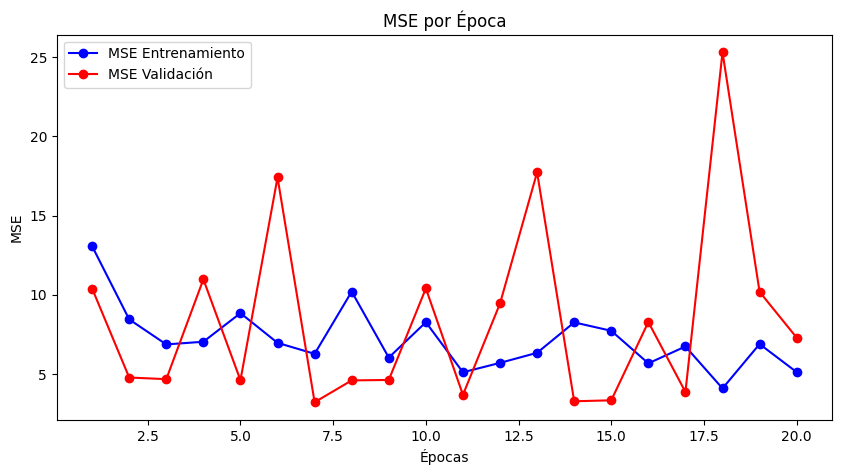

In [31]:
import matplotlib.pyplot as plt

# Suponiendo que 'history' es el objeto retornado por model.fit()
mse_train = history.history['mean_squared_error']
mse_val = history.history['val_mean_squared_error']
epochs = range(1, len(mse_train) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, mse_train, 'bo-', label='MSE Entrenamiento')
plt.plot(epochs, mse_val, 'ro-', label='MSE Validación')
plt.title('MSE por Época')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.show()

## 2.3 PREDECIR HERIDOS LEVES

In [32]:
dfHeridosHospAnn=df
columns_to_drop = [
    'Peatones Fallecidos', 'Motocicletas Fallecidos', 'Turismos Fallecidos', 'Ciclomotores Fallecidos', "Bicicletas Fallecidos", "Furgonetas Fallecidos", "Camiones Fallecidos", "Autobus Fallecidos", "Otros Fallecidos",
    'Peatones Heridos Graves', 'Motocicletas Heridos Graves','Turismos Heridos Graves', 'Ciclomotores Heridos Graves', 'Bicicletas Heridos Graves',"Furgonetas Heridos Graves", "Camiones Heridos Graves", "Autobus Heridos Graves", "Otros Heridos Graves",
    'Peatones Heridos Leves','Motocicletas Heridos Leves','Turismos Heridos Leves','Ciclomotores Heridos Leves','Bicicletas Heridos Leves', 'Furgonetas Heridos Leves','Camiones Heridos Leves', 'Autobus Heridos Leves', 'Otros Heridos Leves',
    "N Accidentes con Victimas", "Heridos Hospitalizados",  'Heridos no Hospitalizados', "Fallecidos"
]

X = dfHeridosHospAnn.drop(columns=columns_to_drop, axis=1)
y = dfHeridosHospAnn['Heridos no Hospitalizados']

In [33]:
import pandas as pd


# Utiliza el método select_dtypes para seleccionar las columnas categóricas
categoricas = dfHeridosHospAnn.select_dtypes(include=['object'])

# Imprime las variables categóricas
print(categoricas)

      Codigo INE    Provincia Comunidad Autonoma   Año
0           1001  Araba/Álava         País Vasco  2017
1           1002  Araba/Álava         País Vasco  2017
2           1003  Araba/Álava         País Vasco  2017
3           1004  Araba/Álava         País Vasco  2017
4           1006  Araba/Álava         País Vasco  2017
...          ...          ...                ...   ...
47711      50297     Zaragoza             Aragón  2022
47712      50298     Zaragoza             Aragón  2022
47713      50901     Zaragoza             Aragón  2022
47714      50902     Zaragoza             Aragón  2022
47715      50903     Zaragoza             Aragón  2022

[47716 rows x 4 columns]


In [34]:
categorical_features = ['Codigo INE', 'Provincia', 'Comunidad Autonoma', "Año"]
numerical_features = X.columns.difference(categorical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [35]:

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data and transform the test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Define the ANN model
def build_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1)  # Output layer for regression; use activation='sigmoid' or 'softmax' for classification
    ])
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

In [36]:
# Asegúrate de convertir las matrices dispersas en arrays densos
X_train = X_train.toarray()
X_test = X_test.toarray()

In [37]:
# Build and train the model
model = build_model(X_train.shape[1])
history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.2, verbose=1)

C:\Users\lolar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 22485.0742 - mean_squared_error: 22485.0742 - val_loss: 4305.5532 - val_mean_squared_error: 4308.3740
Epoch 2/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 1888.8224 - mean_squared_error: 1888.8219 - val_loss: 2926.1074 - val_mean_squared_error: 2928.0217
Epoch 3/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 2844.8000 - mean_squared_error: 2844.8018 - val_loss: 8866.8525 - val_mean_squared_error: 8872.6621
Epoch 4/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 4537.0254 - mean_squared_error: 4537.0229 - val_loss: 3156.8462 - val_mean_squared_error: 3158.9060
Epoch 5/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 1411.0033 - mean_squared_error: 1411.0035 - val_loss: 4179.9966 - val_mean_squared_error: 4182.7314
Epoch 6/20
3054/3054 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 3094.5198 - mean_squared_error: 3094.5178 - val_loss: 2353.5259 - val_mean_squared_error: 2355.0662
Epoch 7/20
3054/3054

In [38]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2  # Output the MSE and R2 scores to compare with Random Forest

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


(3057.94914123227, 0.9576615142116492)

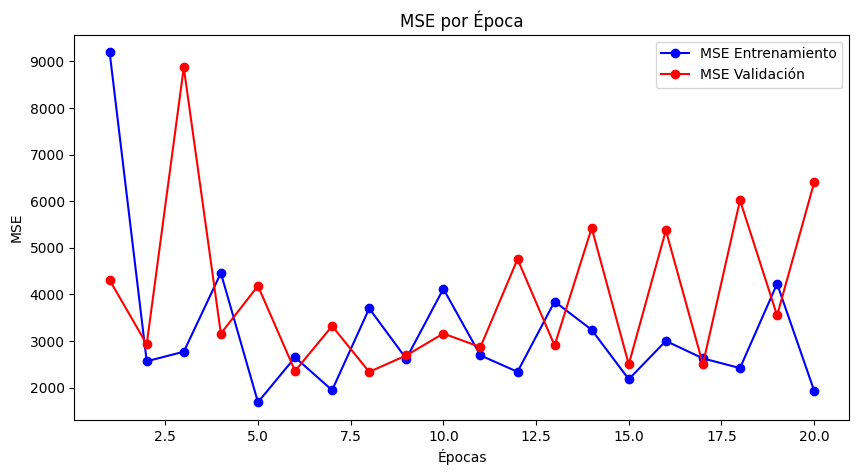

In [39]:
import matplotlib.pyplot as plt

# Suponiendo que 'history' es el objeto retornado por model.fit()
mse_train = history.history['mean_squared_error']
mse_val = history.history['val_mean_squared_error']
epochs = range(1, len(mse_train) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, mse_train, 'bo-', label='MSE Entrenamiento')
plt.plot(epochs, mse_val, 'ro-', label='MSE Validación')
plt.title('MSE por Época')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.show()

# 3. LINEAR REGRESSION

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

## 3.1 Fallecidos

In [31]:
dfFallecidos=df
columns_to_drop = [
    'Peatones Fallecidos', 'Motocicletas Fallecidos', 'Turismos Fallecidos', 'Ciclomotores Fallecidos', "Bicicletas Fallecidos", "Furgonetas Fallecidos", "Camiones Fallecidos", "Autobus Fallecidos", "Otros Fallecidos",
    'Peatones Heridos Graves', 'Motocicletas Heridos Graves','Turismos Heridos Graves', 'Ciclomotores Heridos Graves', 'Bicicletas Heridos Graves',"Furgonetas Heridos Graves", "Camiones Heridos Graves", "Autobus Heridos Graves", "Otros Heridos Graves",
    'Peatones Heridos Leves','Motocicletas Heridos Leves','Turismos Heridos Leves','Ciclomotores Heridos Leves','Bicicletas Heridos Leves', 'Furgonetas Heridos Leves','Camiones Heridos Leves', 'Autobus Heridos Leves', 'Otros Heridos Leves',
    "N Accidentes con Victimas", "Heridos Hospitalizados",  'Heridos no Hospitalizados', "Fallecidos", "Codigo INE", "Provincia", "Comunidad Autonoma"
]

X = dfFallecidos.drop(columns=columns_to_drop, axis=1)
y = dfFallecidos['Fallecidos']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Crear un pipeline para estandarizar las características y ajustar el modelo
pipeline = make_pipeline(StandardScaler(), Lasso(alpha=0.1))

# Ajustar el modelo Lasso con los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Realizar predicciones
y_pred_lasso = pipeline.predict(X_test)

# Calcular el RMSE para el modelo Lasso
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"RMSE (Lasso): {rmse_lasso}")

# Obtener los coeficientes
coeficientes = pipeline.named_steps['lasso'].coef_
feature_importance = sorted(zip(X_train.columns, coeficientes), key=lambda x: abs(x[1]), reverse=True)

# Mostrar las características más importantes
print("\nCaracterísticas más importantes (Lasso):")
for feature, coef in feature_importance[:10]:
    print(f"{feature}: {coef}")


RMSE (Lasso): 0.38392793806671754

Características más importantes (Lasso):
Poblacion Mujeres: 0.27455257994931476
Turismos sin ITV (<25 años): 0.05451970047097453
Parque Motocicletas (<15 años): 0.03457700545924134
Censo Conductores: 0.029549987684542364
Conductores Hombres: 0.021677535145607444
Población Total: 0.0
Poblacion Hombres: 0.0
Conductoras Mujeres: 0.0
Parque Ciclomotores: 0.0
Parque Motocicletas: 0.0


Coeficientes Significativos: Las características como Poblacion Mujeres, Turismos sin ITV (<25 años), Parque Motocicletas (<15 años), Censo Conductores, y Conductores Hombres tienen coeficientes distintos de cero, lo que indica que están influyendo en el modelo predictivo.
Coeficientes en Cero: El hecho de que varias características, como Población Total, Poblacion Hombres, Conductoras Mujeres, Parque Ciclomotores, y Parque Motocicletas tengan coeficientes iguales a cero indica que la regularización Lasso ha determinado que estas características no contribuyen significativamente a la predicción y las ha eliminado del modelo. Esto ayuda a simplificar el modelo, eliminando multicolinealidad y seleccionando solo las características más relevantes.
RMSE (Lasso): El valor de RMSE de alrededor de 0.38 indica el nivel de precisión del modelo. Si bien es difícil evaluar su rendimiento sin conocer más detalles sobre los datos, puede servir como una base para comparar con otros modelos.

### 3.2 Predecir Heridos Leves

In [34]:
dfFallecidos=df
columns_to_drop = [
    'Peatones Fallecidos', 'Motocicletas Fallecidos', 'Turismos Fallecidos', 'Ciclomotores Fallecidos', "Bicicletas Fallecidos", "Furgonetas Fallecidos", "Camiones Fallecidos", "Autobus Fallecidos", "Otros Fallecidos",
    'Peatones Heridos Graves', 'Motocicletas Heridos Graves','Turismos Heridos Graves', 'Ciclomotores Heridos Graves', 'Bicicletas Heridos Graves',"Furgonetas Heridos Graves", "Camiones Heridos Graves", "Autobus Heridos Graves", "Otros Heridos Graves",
    'Peatones Heridos Leves','Motocicletas Heridos Leves','Turismos Heridos Leves','Ciclomotores Heridos Leves','Bicicletas Heridos Leves', 'Furgonetas Heridos Leves','Camiones Heridos Leves', 'Autobus Heridos Leves', 'Otros Heridos Leves',
    "N Accidentes con Victimas", "Heridos Hospitalizados",  'Heridos no Hospitalizados', "Fallecidos", "Codigo INE", "Provincia", "Comunidad Autonoma"
]

X = dfFallecidos.drop(columns=columns_to_drop, axis=1)
y = dfFallecidos['Heridos no Hospitalizados']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Crear un pipeline para estandarizar las características y ajustar el modelo
pipeline = make_pipeline(StandardScaler(), Lasso(alpha=0.1))

# Ajustar el modelo Lasso con los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Realizar predicciones
y_pred_lasso = pipeline.predict(X_test)

# Calcular el RMSE para el modelo Lasso
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"RMSE (Lasso): {rmse_lasso}")

# Obtener los coeficientes
coeficientes = pipeline.named_steps['lasso'].coef_
feature_importance = sorted(zip(X_train.columns, coeficientes), key=lambda x: abs(x[1]), reverse=True)

# Mostrar las características más importantes
print("\nCaracterísticas más importantes (Lasso):")
for feature, coef in feature_importance[:10]:
    print(f"{feature}: {coef}")


RMSE (Lasso): 69.90738459577773

Características más importantes (Lasso):
Parque Motocicletas: 139.04622812952314
Motocicletas sin ITV (<25 años): -92.84207086494821
Parque Camiones (<25 años): -86.34872893200026
Parque Motocicletas (<4 años): 81.38460288563256
Parque Turismos: 78.42834027150089
Parque Furgonetas: 75.16033836602615
Parque Ciclomotores: 72.69994400888466
Parque Motocicletas (<25 años): -66.41942084512787
Parque Furgonetas (<25 años): -58.54541412059755
Parque Camiones (<15 años): 57.99650092519937


C:\Users\lolar\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.110e+07, tolerance: 8.024e+04
  model = cd_fast.enet_coordinate_descent(


### 3.2 Heridos Graves


In [36]:
dfFallecidos=df
columns_to_drop = [
    'Peatones Fallecidos', 'Motocicletas Fallecidos', 'Turismos Fallecidos', 'Ciclomotores Fallecidos', "Bicicletas Fallecidos", "Furgonetas Fallecidos", "Camiones Fallecidos", "Autobus Fallecidos", "Otros Fallecidos",
    'Peatones Heridos Graves', 'Motocicletas Heridos Graves','Turismos Heridos Graves', 'Ciclomotores Heridos Graves', 'Bicicletas Heridos Graves',"Furgonetas Heridos Graves", "Camiones Heridos Graves", "Autobus Heridos Graves", "Otros Heridos Graves",
    'Peatones Heridos Leves','Motocicletas Heridos Leves','Turismos Heridos Leves','Ciclomotores Heridos Leves','Bicicletas Heridos Leves', 'Furgonetas Heridos Leves','Camiones Heridos Leves', 'Autobus Heridos Leves', 'Otros Heridos Leves',
    "N Accidentes con Victimas", "Heridos Hospitalizados",  'Heridos no Hospitalizados', "Fallecidos", "Codigo INE", "Provincia", "Comunidad Autonoma"
]

X = dfFallecidos.drop(columns=columns_to_drop, axis=1)
y = dfFallecidos['Heridos Hospitalizados']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Crear un pipeline para estandarizar las características y ajustar el modelo
pipeline = make_pipeline(StandardScaler(), Lasso(alpha=0.1))

# Ajustar el modelo Lasso con los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Realizar predicciones
y_pred_lasso = pipeline.predict(X_test)

# Calcular el RMSE para el modelo Lasso
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"RMSE (Lasso): {rmse_lasso}")

# Obtener los coeficientes
coeficientes = pipeline.named_steps['lasso'].coef_
feature_importance = sorted(zip(X_train.columns, coeficientes), key=lambda x: abs(x[1]), reverse=True)

# Mostrar las características más importantes
print("\nCaracterísticas más importantes (Lasso):")
for feature, coef in feature_importance[:10]:
    print(f"{feature}: {coef}")

RMSE (Lasso): 7.542847570070917

Características más importantes (Lasso):
Poblacion Mujeres: 2.8523088176109774
Conductoras Mujeres: 2.4528477773252653
Conductores Hombres: 0.5116240658288216
Parque Ciclomotores (<4 años): -0.4297750918526113
Antiguedad Media del Parque (<25 años): 0.06887024006815926
Antiguedad Media de Furgonetas: 0.04195360740757467
Población Total: 0.0
Poblacion Hombres: 0.0
Censo Conductores: 0.0
Parque Ciclomotores: 0.0
